In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] ='bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 15

# Nonequilibrium Dynamics: Oscillation 
## Modeling Life, chapter 4, class 2
IBM3101 - Francisco Sahli


## Bifurcations and the onset of oscillation

### Stable oscillations in an Ecological model

Holling-Taner model

$P$: predator

$N$: prey

We now consider that now the predators get full, replacing the term $aNP$ by $f(N)P$, with:
$$ f(N) = \frac{C_{max}N}{N + h} $$

Text(0, 0.5, 'f(N)')

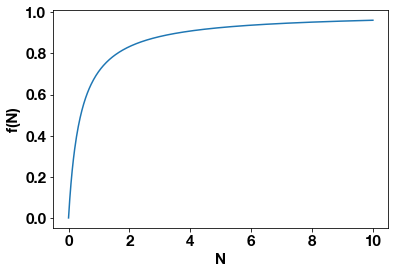

In [94]:
cmax = 1
h = 0.4

N = np.linspace(0,10,500)
fN = cmax*N/(N + h)
plt.plot(N, fN)
plt.xlabel('N')
plt.ylabel('f(N)')

Putting toghether the model:

$\begin{eqnarray}
N' &=& r_1 N\left(1 - \frac{N}{k}\right) - \frac{wN}{d + N}P\\
P' &=& r_2P\left(1 - \frac{jP}{N}\right)
\end{eqnarray}$

Text(0, 0.5, 'P')

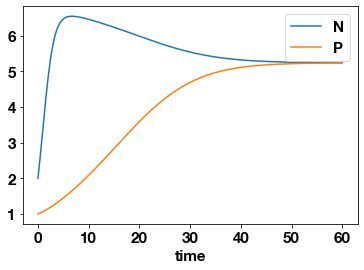

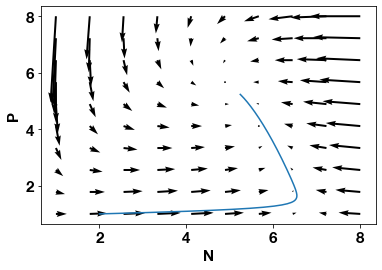

In [95]:
def HTmodel(y, t, r1, k, w, d, r2, j):
    N, P = y
    Np = r1*N*(1 - N/k) - w*N/(d + N)*P
    Pp = r2*P*(1 - j*P/N)
    return [Np, Pp]

r1 = 1
r2 = 0.1
k = 7
d = 1
j = 1
w = 0.3

Y0 = [2, 1]
time = np.linspace(0, 60, 300)
Y = odeint(HTmodel, Y0, time, args = (r1, k, w, d, r2, j))

plt.plot(time, Y[:,0], label = 'N')
plt.plot(time, Y[:,1], label = 'P')
plt.xlabel('time')
plt.legend()

n = p = np.linspace(1, 8, 10)
Ng, Pg = np.meshgrid(n, p)

Np, Pp = HTmodel([Ng, Pg], 0, r1, k, w, d, r2, j)

plt.figure()
plt.quiver(Ng, Pg, Np, Pp)
plt.plot(Y[:,0],Y[:,1])
plt.xlabel('N')
plt.ylabel('P')

Text(0, 0.5, 'P')

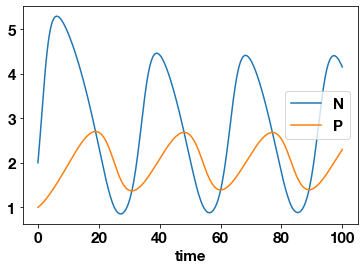

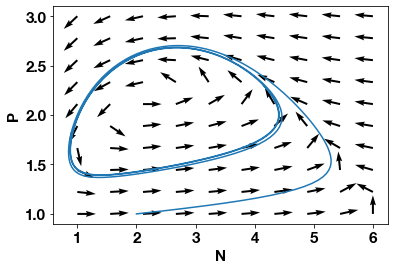

In [177]:
r1 = 1
r2 = 0.1
k = 7
d = 1
j = 1
w = 1 # changed only w

Y0 = [2, 1]
time = np.linspace(0, 100, 300)
Y = odeint(HTmodel, Y0, time, args = (r1, k, w, d, r2, j))

plt.plot(time, Y[:,0], label = 'N')
plt.plot(time, Y[:,1], label = 'P')
plt.xlabel('time')
plt.legend()

n = np.linspace(1, 6, 10)
p = np.linspace(1, 3, 10)
Ng, Pg = np.meshgrid(n, p)
Np, Pp = HTmodel([Ng, Pg], 0, r1, k, w, d, r2, j)
norm = np.sqrt(Np**2 + Pp**2)

plt.figure()

plt.quiver(Ng, Pg, Np/norm, Pp/norm)
plt.plot(Y[:,0],Y[:,1])
plt.xlabel('N')
plt.ylabel('P')


In [63]:
from scipy.optimize import root

w = 0.3
eq_stable = root(HTmodel, Y0,  args = (0, r1, k, w, d, r2, j)).x

pert = np.array([[0.01, 0.00],
                 [0.00, 0.01]])


pert_eq_stable = HTmodel(eq_stable + pert, 0, r1, k, w, d, r2, j)
print('stable equilibrium point', eq_stable)
print('perturbed N', pert_eq_stable[0][0])
print('perturbed P', pert_eq_stable[1][1])
print('-------------------------')

w = 1
eq_unstable = root(HTmodel, Y0,  args = (0, r1, k, w, d, r2, j)).x
pert_eq_unstable = HTmodel(eq_unstable + pert, 0, r1, k, w, d, r2, j)

print('unstable equilibrium point', eq_unstable)
print('perturbed N', pert_eq_unstable[0][0])
print('perturbed P', pert_eq_unstable[1][1])
print('-------------------------')



stable equilibrium point [5.23671569 5.23671569]
perturbed N -0.005379578848984767
perturbed P -0.0010019095938369857
-------------------------
unstable equilibrium point [2.1925824 2.1925824]
perturbed N 0.0015767551266954172
perturbed P -0.0010045608320050836
-------------------------


The destruction of a stable equilibrium point and its replacement by an unstable equilibrium point and a stable limit cycle attractor is called **Hopf bifurcation.**

## Bifurcation diagram for the respiration model

In [86]:
def respiration(tau, Vmax):
    dt = 0.01
    itau = int(tau/dt) + 1 # number of steps that I need to look back
    Xsol = [0.5]*itau
    Vsol = []
    t = [0]

    final_time = 20
    n_steps = int(final_time/dt)

    n = 5
    L = 6
    # euler's method to integrate the system
    for i in range(n_steps):
        V = Vmax*Xsol[-itau]**n/(1 + Xsol[-itau]**n)
        Vsol.append(V)
        t.append(t[-1] + dt)
        Xp = L - V*Xsol[-1]
        Xsol.append(Xsol[-1] + dt*Xp)

    tol = 1e-6
    return (np.array(Vsol[-100:]).std() < tol)

respiration(0.1, 10)

stable = []

taus = np.arange(0.05,0.4, 0.01)
vmaxs = np.linspace(2,20, taus.shape[0])

Taus, Vmaxs = np.meshgrid(taus, vmaxs)

for tau, vmax in zip(Taus.ravel(), Vmaxs.ravel()):
    stable.append(respiration(tau, vmax))


Text(0, 0.5, '$V_{max}$')

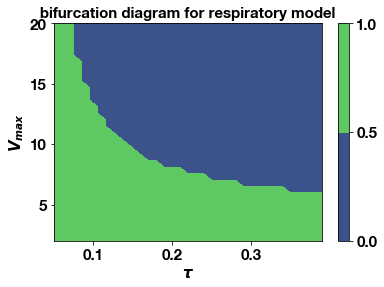

In [111]:
stable = np.array(stable)

plt.contourf(Taus, Vmaxs, stable.reshape(Taus.shape), [0,0.5,1])
plt.colorbar()
plt.title('bifurcation diagram for respiratory model')
plt.xlabel('$\\tau$')
plt.ylabel('$V_{max}$')

## 4.4 The neuron: excitable and oscillatory systems

We will cover this topic with more detail later in the class, here we will focus mostly on the behavior of the model

![alt text](Ch4Images/cell.png)


### The action potential of a neuron

In 1952 Hodgkin and Huxley developed a mathematical model of action potential of a neuron that received the Nobel prize in 1963.
![alt text](Ch4Images/AP.png)

Here, we will develop a two-variable simplification of the Hodgkin–Huxley model that captures the essential dynamics, called the FitzHugh–Nagumo (FHN) model.
Hodgkin and Huxley stylized the action potential into three stages: 
1. Voltage is elevated by the inrush of Na+ ions.
2. Voltage returns to the resting state by the outflow of K+ ions.
3. Pumps restore the ion imbalances.

**Fast inward process**:
- is created a by a fast inward flow of sodium ions
- there must be a region of negative resistance (analogous to positive friction)
- there must be an stable equilibrium point around the equilibrium voltage

$$\begin{eqnarray}
V' &=& I_{ext} + f(V)\\
f(V) &=& V(1-V)(V-a)
\end{eqnarray}
$$

Text(0, 0.5, 'f(V)')

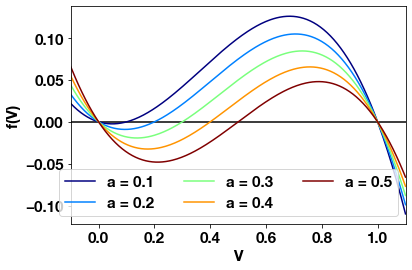

In [105]:
As = [0.1, 0.2, 0.3, 0.4, 0.5]
V = np.linspace(-0.1, 1.1, 300)
cmap = plt.cm.jet

for a in As:
    fV = V*(1 - V)*(V - a)
    plt.plot(V, fV, color = cmap((a - 0.1)/0.4), label = 'a = %.1f' % a)
    
plt.hlines(0,V[0],V[-1], 'k')
plt.xlim([V[0],V[-1]])    
plt.legend(ncol = 3)
plt.xlabel('V')
plt.ylabel('f(V)')


Text(0, 0.5, 'V')

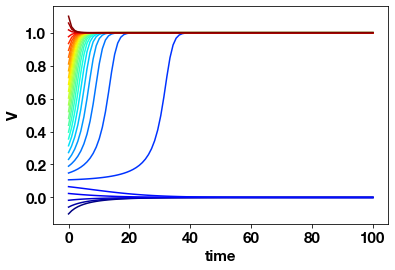

In [110]:
def fast_inward(V, t, a):
    Vp = V*(1 - V)*(V - a)
    return Vp
time = np.linspace(0,100,100)
V0s = np.linspace(-0.1, 1.1, 30)
a = 0.1

cmap = plt.cm.jet

for V0 in V0s:
    V = odeint(fast_inward, V0, time, args = (a,))
    plt.plot(time, V, color = cmap((V0 - V0s[0])/(V0s[-1] - V0s[0])))

plt.xlabel('time')
plt.ylabel('V')

change the parameter $a$ and see what happens

**Recovery process**: it is dominated by outflow of potassium ions.
$$w' = V - \gamma w$$

We can now put together the FitzHugh–Nagumo model:

$$\begin{eqnarray}
V' &=& \frac{1}{\epsilon}\left(- w + f(V) + I_{ext} \right)\\
w' &=& V - \gamma w
\end{eqnarray}$$

### Numerical experiments

Text(0, 0.5, 'V')

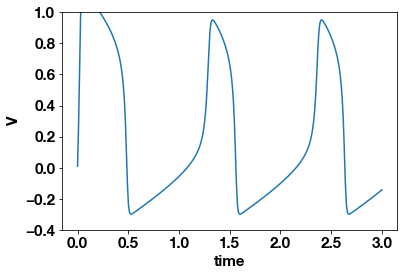

In [134]:
def Iext(t, tstart, duration, amplitude):
    return (tstart <= t <= (tstart + duration))*amplitude

def FHN(Y, t, eps, a, gamma, tstart, duration, amplitude):
    V, w = Y
    I = Iext(t, tstart, duration, amplitude)
    Vp = (- w + V*(1 - V)*(V - a) + I)/eps
    wp = V - gamma*w
    return [Vp, wp]

Y0 = [0.01, 0.0]
tstart = 0.0
duration = 0.2
amplitude = 0.03
eps = 0.008
gamma = 0.5
a = 0.1

time = np.linspace(0, 3, 300)

Y = odeint(FHN, Y0, time, args = (eps, a, gamma, tstart, duration, amplitude))

plt.plot(time, Y[:,0])
plt.ylim([-0.4,1])
plt.xlabel('time')
plt.ylabel('V')


- divide the `amplitude` of the stimulus by 3 and then divide the `duration` of the stimulus by 3 and comment what happens
- apply a constant $I_{ext}$ of amplitude 0.08 and 0.2

### Dynamics of the FitzHugh–Nagumo Model

We can compute the nullclines of this model:
$$\begin{eqnarray}
V' &=& \frac{1}{\epsilon}\left(- w + f(V) + I_{ext} \right) = 0\\
\rightarrow w &=& V(1-V)(V-a) + I_{ext}\\
w' &=& V - \gamma w\\
\rightarrow w &=& \frac{1}{\gamma}V
\end{eqnarray}$$

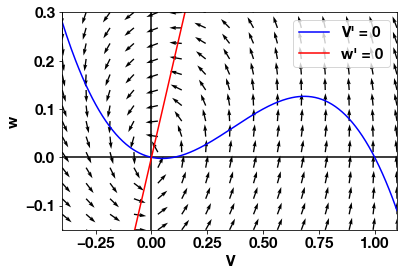

In [178]:
def plot_FHN_nullclines(a, gamma, I_ext, quiver = True):
    V = np.linspace(-0.4, 1.1, 300)
    wmin = -0.15
    wmax = 0.3
    n1 = V*(1 - V)*(V - a) + I_ext
    n2 = V/gamma
    
    plt.hlines(0, V[0], V[-1])
    plt.vlines(0, wmin, wmax)
    plt.plot(V, n1, color = 'blue', label = 'V\' = 0')
    plt.plot(V, n2, color = 'red', label = 'w\' = 0')

    plt.xlabel('V')
    plt.ylabel('w')
    plt.xlim([V[0], V[-1]])
    plt.ylim([wmin, wmax])
    
    plt.legend()
    
    if quiver:
        v = np.linspace(V[0],V[-1], 15)
        w = np.linspace(wmin, wmax, 15)

        Vg, wg = np.meshgrid(v, w)

        Vp, wp = FHN([Vg, wg], 0, 1, a, gamma, 0, 1e6, I_ext)
        norm = np.sqrt(Vp**2 + wp**2)
        plt.quiver(Vg, wg, Vp/norm, wp/norm)
    
    
plot_FHN_nullclines(a, gamma, 0)
    

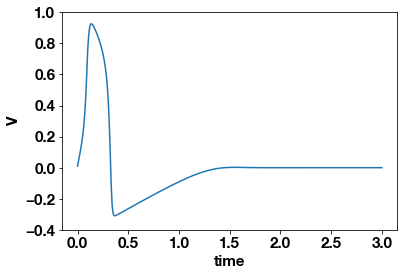

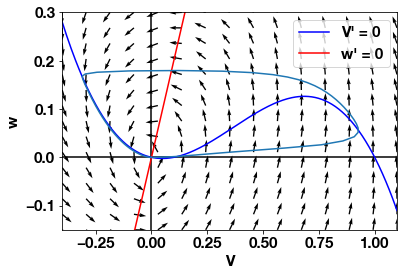

In [179]:
Y0 = [0.01, 0.0]
tstart = 0.0
duration = 0.1
amplitude = 0.03
eps = 0.008
gamma = 0.5
a = 0.1

time = np.linspace(0, 3, 300)

Y = odeint(FHN, Y0, time, args = (eps, a, gamma, tstart, duration, amplitude))

plt.plot(time, Y[:,0])
plt.ylim([-0.4,1])
plt.xlabel('time')
plt.ylabel('V')

plt.figure()
plot_FHN_nullclines(a, gamma, 0)
plt.plot(Y[:,0], Y[:,1])


- divide the `amplitude` of the stimulus by 2 comment what happens
- apply a constant $I_{ext}$ of amplitude 0.08 and 0.2. Note you need to also change the 3rd parameter of the function `plot_FHN_nullclines`